# Electric Motor Temperature Estimation

**Link**

https://www.kaggle.com/wkirgsn/electric-motor-temperature


**Context**

The data set comprises several sensor data collected from a permanent magnet synchronous motor (PMSM) deployed on a test bench. The PMSM represents a german OEM's prototype model. Test bench measurements were collected by the LEA department at Paderborn University. This data set is mildly anonymized.

**Content**

All recordings are sampled at 2 Hz. The data set consists of multiple measurement sessions, which can be distinguished from each other by column `profile_id`. A measurement session can be between one and six hours long.

The motor is excited by hand-designed driving cycles denoting a reference motor speed and a reference torque. Currents in d/q-coordinates (columns `i_d` and `i_q`) and voltages in d/q-coordinates (columns `u_d` and `u_q`) are a result of a standard control strategy trying to follow the reference speed and torque. Columns `motor_speed` and `torque` are the resulting quantities achieved by that strategy, derived from set currents and voltages.

Most driving cycles denote random walks in the speed-torque-plane in order to imitate real world driving cycles to a more accurate degree than constant excitations and ramp-ups and -downs would.

The dataset contains following attributes:
- u_q - Voltage q-component measurement in dq-coordinates (in V)
- coolant - Coolant temperature (in °C)
- stator_winding - Stator winding temperature (in °C) measured with thermocouples
- u_d - Voltage d-component measurement in dq-coordinates
- stator_tooth - Stator tooth temperature (in °C) measured with thermocouples
- motor_speed - Motor speed (in rpm)
- i_d - Current d-component measurement in dq-coordinates
- i_q - Current q-component measurement in dq-coordinates
- pm - Permanent magnet temperature (in °C) measured with thermocouples 
- stator_yoke - Stator yoke temperature (in °C) measured with thermocouples
- ambient - Ambient temperature (in °C)
- torque - Motor torque (in Nm)
- profile_id - Measurement session id. Each distinct measurement session can be identified through this integer id.

The `pm` attribute is our target variable, which should be predicted depending on new measurements.

**Task (Regression)**

Your task is to use the present data set to predict the temperature of the motors permament magnet. To do this, use the `Decision Tree` and `ANN` methods for this task. You must also include a third method that you have selected yourself.

First of all, get an overview of the project in your group. Then carefully read the checklist for machine learning projects and think about how you want to organize your group work. It is strongly recommended that all task items are completed by all group members. You can divide the focus among yourself, but make sure that all members are as well informed as possible about the content.

Use the checklist for machine learning projects as a guide when working on the task. Document all the individual steps that are listed there (main and sub-items). Make sure to use Markdown Cells for your documentation. Document the functionality of your algorithms (all three) with equations and explanations. Dont forget, this project is a task for five students. We expect a detailed documentation of your approach and your results.

**Note**

We are aware that there are examples and solutions for the selected data sets on popular platforms, e.g. Kaggle. You are welcome to use them as a guide. But remember that at the end of the project, your own work will be assessed. We compare the results with the popular solutions of common platforms. We would like to recognize the independence in your work and see a difference to the existing solution approaches.

* **Frame the Problem and Look at the Big Picture:**

    1. **Define the objective of your project in your own words.** <br>
    Machine Learning should be used to estimate the magnet temperature of an electric car motor. Therefore 3 machine learning regression algorythms must be used.<br><br>
    2. **Select a performance criteria for evaluation of the task.** <br>
    Root Mean Square Error (RMSE)<br>
    Mean Squared Error (MSE)<br>
    Mean Absolute Error (MAE)<br>
    Coefficient of determination (R2)<br><br>
    3. **Explain in a paragraph how you would solve the problem manually.** <br>
    First determine the relevant Parameters, then perform a classic regression<br><br>
    4. **List assumptions that you made so far.** <br>
    We want the predict the exact tempreture, not a section where it is to hot. So regression is the right method, not classification<br><br><br><br>
   Good example for the problem:<br>
   **https://www.kaggle.com/code/laxmansingh12/electric-motor-temperature-prediction**

* **Get the Data:**
    1. Create a new workspace for the course project. 
    2. Discuss with your colleagues whether you would like to use a version management tool.
        - git: https://git-scm.com/
        - github: https://github.com/
        - github tutorial: https://guides.github.com/activities/hello-world/
    3. Get the data.
    4. Convert the data to a format you can easily manipulate (if required).
    5. Check the size and type of the data.
    6. Sample a test set, put it aside, and never look at it (no data snooping!).
    7. Sample a training set and a validation set.

In [1]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the data
database = pd.read_csv('measures_v2.csv',sep = ',')

# a copy is created
db = database.copy()

In [2]:
# size and type of data
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


In [3]:
# Creation of the Testset
from sklearn.model_selection import train_test_split

rest_set, test_set = train_test_split(db, test_size=0.2, random_state=11)

print("Lenght of test set: " + str(len(test_set)))
print("Lenght of rest set: " + str(len(rest_set)))

Lenght of test set: 266164
Lenght of rest set: 1064652


In [4]:
test_set.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
722369,130.618692,29.050824,61.439510,0.002221,52.941690,3553.990284,-46.615213,-1.604462,59.373981,43.563195,26.384410,-2.169952,53
1280896,68.190920,49.863316,78.749380,-112.427244,68.909741,2567.191703,-108.862588,136.358895,66.631247,59.875995,27.177060,116.708366,58
668531,17.199327,40.748283,97.473761,-129.257835,75.236424,4999.961953,-205.664365,76.189573,73.635881,57.333054,23.154760,75.000000,41
2358,87.597618,19.468315,71.651123,-96.182190,56.600018,4999.952148,-138.393463,53.406368,63.024918,39.537643,23.174236,48.502354,17
1242057,22.233465,87.194638,122.463910,-128.911239,104.791174,4264.252190,-195.114427,90.687950,90.172948,95.318739,26.383176,90.518617,79


In [6]:
rest_set.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
1065105,0.549468,35.792282,42.018726,2.707322,39.452287,0.002817,-2.000202,1.097579,49.737174,38.228199,26.384509,-3.705492e-320,65
443089,91.674026,18.754559,31.246090,-44.001427,29.668547,1959.985352,-13.557429,64.153595,38.442070,25.785791,22.151615,4.648170e+01,30
256844,-1.228096,19.241776,122.765396,-130.911072,86.956116,3499.968994,-234.906769,117.438477,69.345360,58.868324,19.850620,1.156626e+02,26
318556,24.751150,18.069561,35.624920,-12.958624,32.348957,499.974609,-15.495132,70.794586,64.057907,27.807426,25.711426,5.118535e+01,6
695641,30.866686,65.404139,114.783688,-75.324903,90.367188,1074.071215,-126.212237,246.861180,71.020983,77.909992,26.498269,2.038671e+02,68


In [7]:
# Creation of Sample and training set

from sklearn.model_selection import train_test_split

train_set, val_set = train_test_split(rest_set, test_size=0.1, random_state=22)

print("Lenght of train set: " + str(len(train_set)))
print("Lenght of val set: " + str(len(val_set)))

Lenght of train set: 958186
Lenght of val set: 106466


In [8]:
train_set.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
136699,24.320995,18.890585,59.897362,0.132441,50.823681,500.052643,-1.999866,1.097511,59.917686,37.942631,25.629496,-0.007173,4
168176,128.486633,18.969570,65.601273,-8.908923,55.838058,5999.939941,-114.690048,0.300825,73.118454,39.452286,26.049330,-0.451166,19
77715,27.948971,19.084904,104.750038,-127.930824,78.856422,4499.959961,-191.440704,83.016991,86.416275,54.124557,21.819103,79.513779,21
666421,94.920324,40.094514,55.905780,-91.082024,50.258112,2999.970347,-83.081876,90.620002,40.584960,45.372747,23.138335,75.000000,41
267611,131.740433,18.714367,33.744148,-3.106886,33.380089,3499.964111,-45.628815,1.170474,46.489033,28.038828,23.367359,-0.537430,26


In [9]:
val_set.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
326835,101.467712,19.018904,76.188278,83.328148,59.951477,4999.952637,-123.058731,-54.198597,60.493641,44.096203,22.565868,-49.788116,10
1149817,119.339509,29.683703,42.817911,-52.773872,39.458286,3500.104527,-64.601953,41.277327,43.266185,36.252214,26.384509,32.911578,42
273141,119.967438,18.752153,58.897972,-50.102253,45.349457,3034.536377,-43.355244,47.066769,41.512131,34.551727,22.993809,37.330696,11
1012316,10.334553,90.410940,111.798389,-1.652322,104.121256,198.267139,-3.833487,19.227422,85.271736,96.869550,25.317860,12.505742,73
561213,131.796021,18.263412,38.681068,-3.886029,36.454433,3999.959229,-67.338776,1.099801,47.797756,29.935198,24.793682,-0.587464,15


* **Explore the Data:**
    1. Create a copy of the training set for exploration (sample it down to a manageable size if necessary).
    2. (Create a Jupyter Notebook for your data exploration.)
    3. Study each attribute and its characteristics
        - name
        - type
        - % of missing values
        - noisiness
        - usefulness for task
        - type of distribution
        - ...
    4. Identify the target attribute (supervised learning).
    5. Visualize the data.
    6. Study correlations between attributes.
    7. Identify the promising transformations you may want to apply.
    8. Document the results of your exploratory data analysis.

In [10]:
# show examples
db.head(10)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17
5,-0.538973,18.901548,19.077108,0.009147,18.290628,0.009636,-0.613635,0.336747,24.573601,18.323862,19.850634,0.476218,17
6,-0.653148,18.941711,19.074583,0.238890,18.292524,0.001337,-1.005647,0.554211,24.576578,18.321936,19.850630,0.670015,17
7,-0.758392,18.960861,19.082499,0.395099,18.294041,0.001422,-1.288384,0.706370,24.574949,18.314655,19.850628,0.752035,17
8,-0.727128,18.973545,19.085533,0.546623,18.291964,0.000577,-1.490530,0.817339,24.567080,18.306925,19.850626,0.910541,17
9,-0.874307,18.987812,19.076025,0.578944,18.287233,-0.001248,-1.634464,0.898013,24.553242,18.301733,19.850624,0.924010,17


In [10]:
db.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01,4.079306e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01,2.504549e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02,2.000000e+00
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01,1.700000e+01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01,4.300000e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02,8.100000e+01


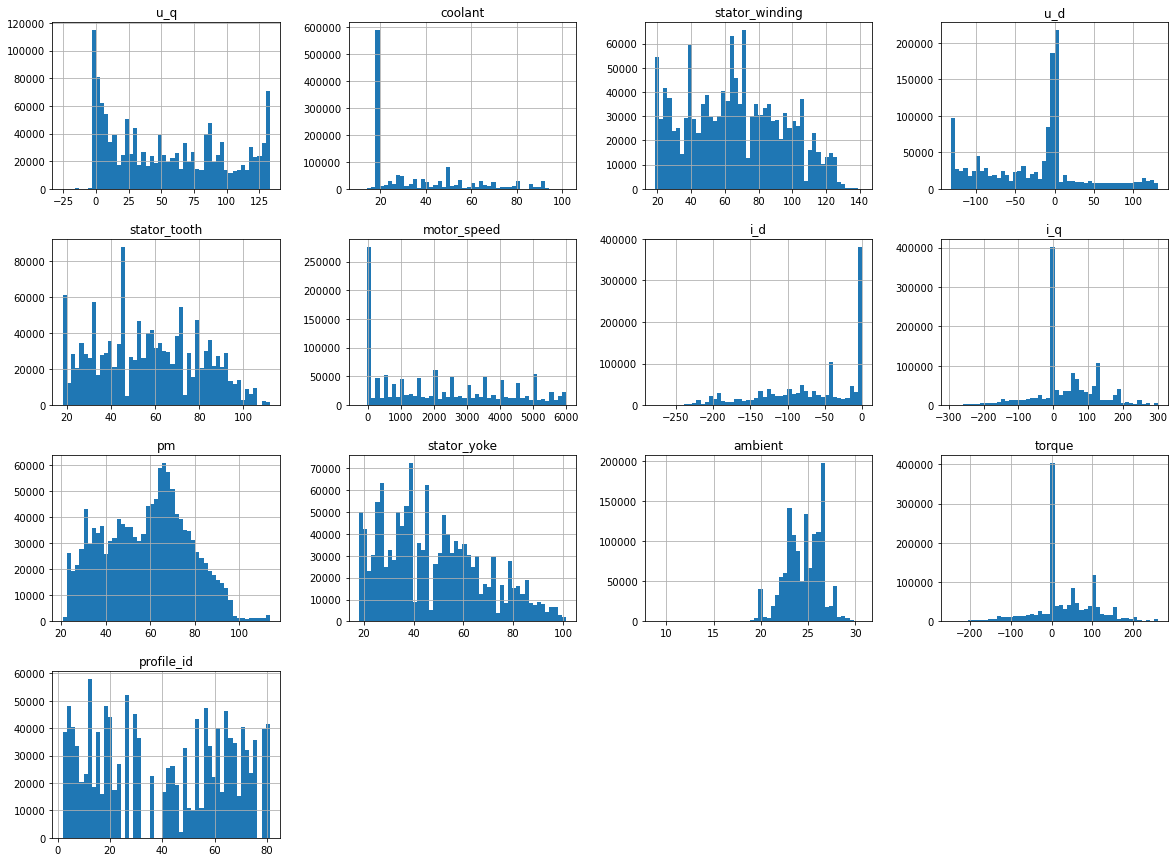

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

db.hist(bins=50, figsize=(20,15))
plt.show()

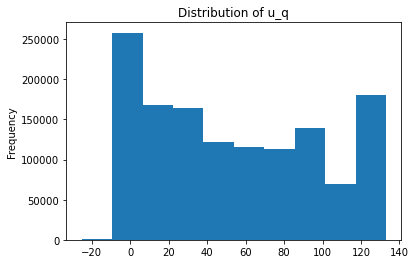

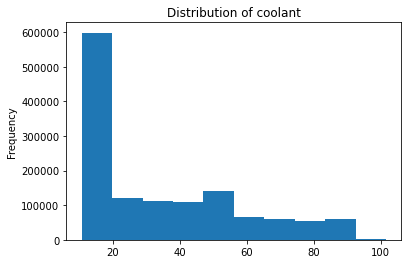

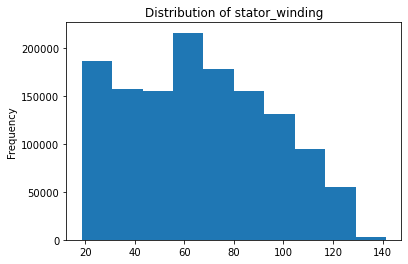

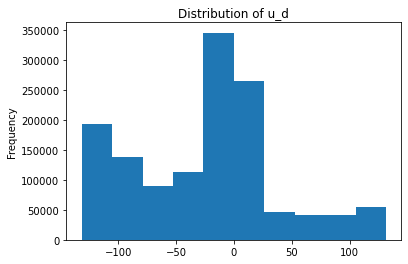

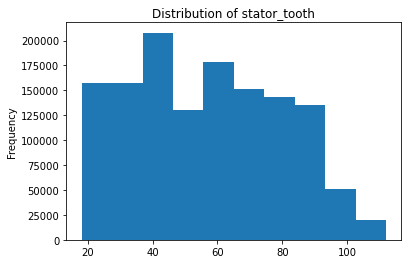

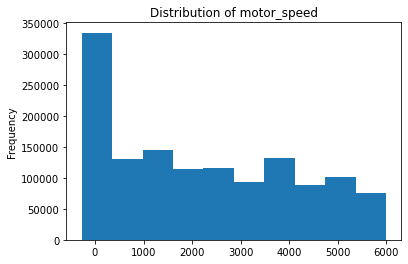

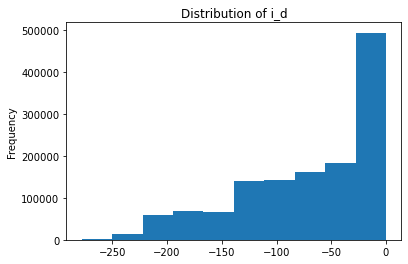

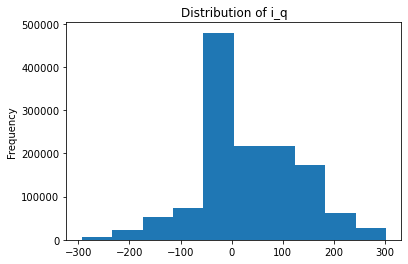

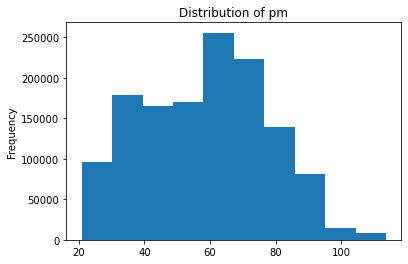

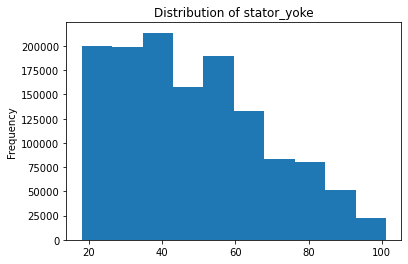

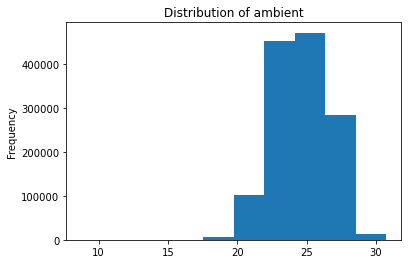

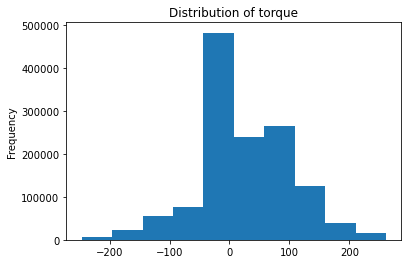

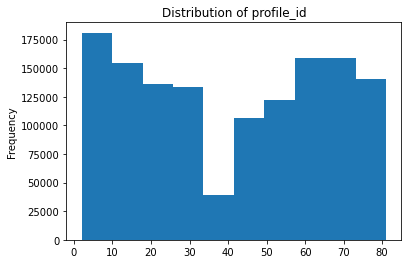

In [12]:
for i in db.columns:
    db[i].plot(kind='hist')
    plt.title(f'Distribution of {i}')
    plt.show()

<AxesSubplot:>

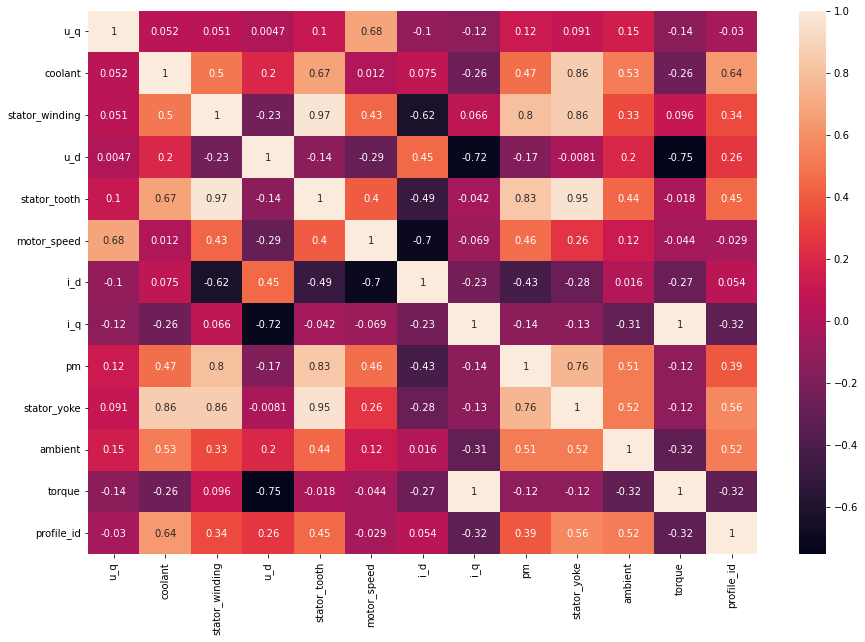

In [13]:
# Correlation on training set or the whole database

corr = db.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)


In [14]:
# Correaltion to pm

db_corr=db.corr()
db_corr['pm']

u_q               0.122365
coolant           0.467117
stator_winding    0.795893
u_d              -0.172031
stator_tooth      0.832084
motor_speed       0.458947
i_d              -0.427736
i_q              -0.142416
pm                1.000000
stator_yoke       0.756684
ambient           0.513728
torque           -0.117138
profile_id        0.386241
Name: pm, dtype: float64

<AxesSubplot:xlabel='torque', ylabel='pm'>

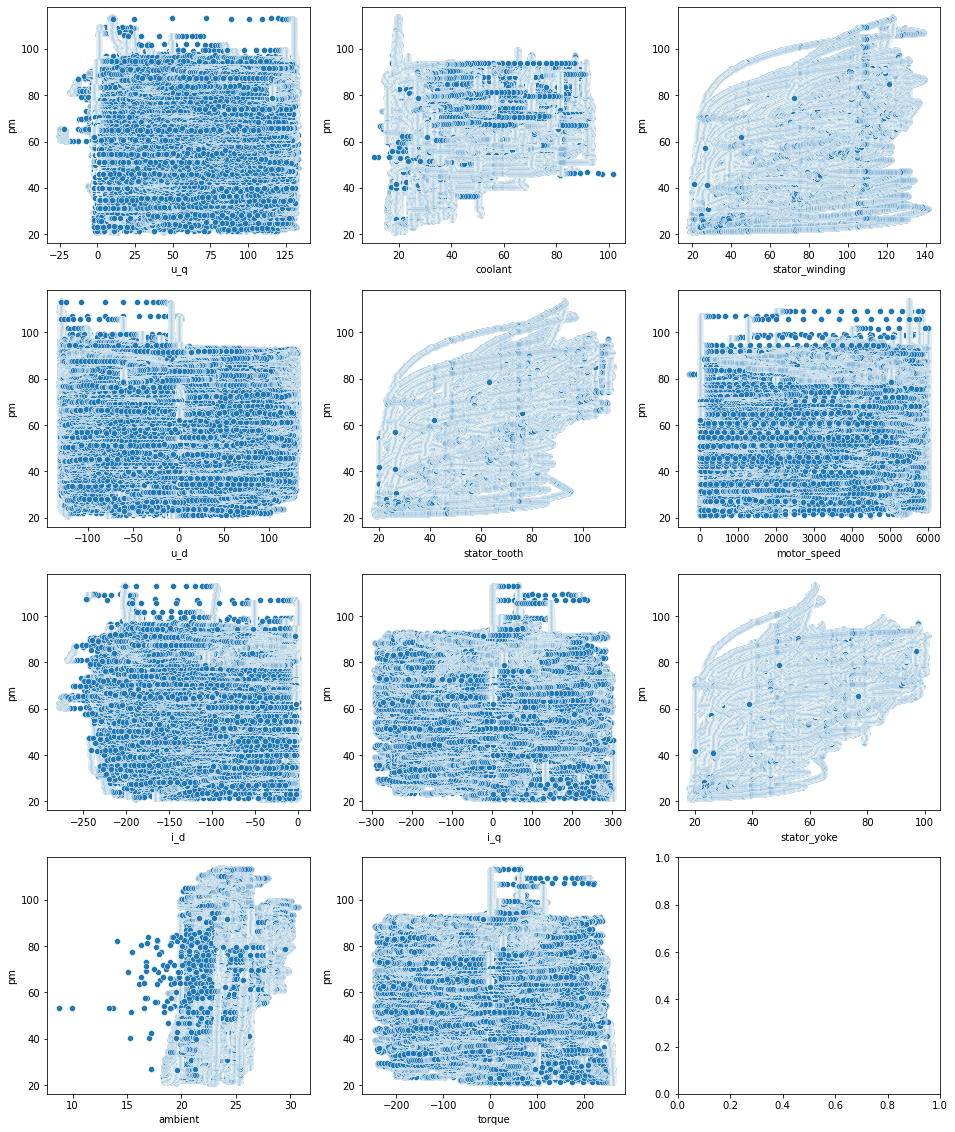

In [15]:
#scatter_matrix for attributes and pm
from pandas.plotting import scatter_matrix

figure,axes = plt.subplots(nrows=4,ncols=3,figsize=(16,20))
sns.scatterplot(data=db,x = 'u_q', y = 'pm',ax=axes[0,0])
sns.scatterplot(data=db,x = 'coolant', y = 'pm',ax=axes[0,1])
sns.scatterplot(data=db,x = 'stator_winding', y = 'pm',ax=axes[0,2])
sns.scatterplot(data=db,x = 'u_d', y = 'pm',ax=axes[1,0])
sns.scatterplot(data=db,x = 'stator_tooth', y = 'pm',ax=axes[1,1])
sns.scatterplot(data=db,x = 'motor_speed', y = 'pm',ax=axes[1,2])
sns.scatterplot(data=db,x = 'i_d', y = 'pm',ax=axes[2,0])
sns.scatterplot(data=db,x = 'i_q', y = 'pm',ax=axes[2,1])
sns.scatterplot(data=db,x = 'stator_yoke', y = 'pm',ax=axes[2,2])
sns.scatterplot(data=db,x = 'ambient', y = 'pm',ax=axes[3,0])
sns.scatterplot(data=db,x = 'torque', y = 'pm',ax=axes[3,1])


In [16]:
# Transformation
# no transformation performed.

In [11]:
#finding null values in the dataset by using the isnull() function
print(db.isnull().sum())

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64


In [12]:
#better option to find isnull
db.isnull().values.any()

False

<AxesSubplot:>

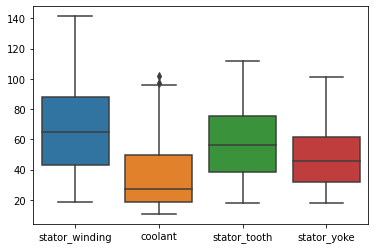

In [26]:
sns.boxplot(data=db[['stator_winding','coolant','stator_tooth','stator_yoke']])

<AxesSubplot:>

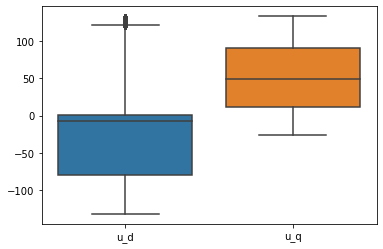

In [27]:
sns.boxplot(data=db[['u_d','u_q']])

<AxesSubplot:>

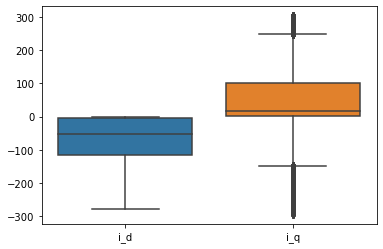

In [28]:
sns.boxplot(data=db[['i_d','i_q']])

<AxesSubplot:>

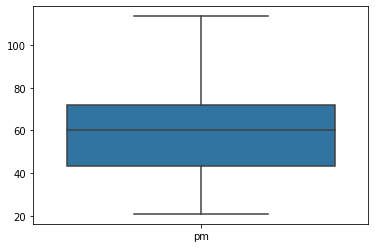

In [29]:
sns.boxplot(data=db[['pm']])

<AxesSubplot:>

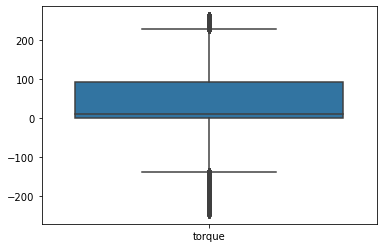

In [30]:
sns.boxplot(data=db[['torque']])

<AxesSubplot:>

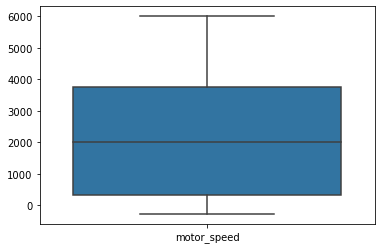

In [31]:
sns.boxplot(data=db[['motor_speed']])

<AxesSubplot:>

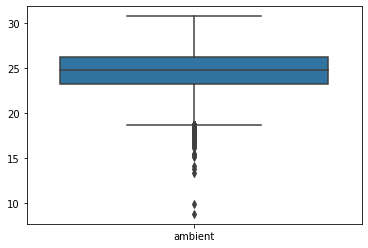

In [32]:
sns.boxplot(data=db[['ambient']])